# 0. Imports

In [90]:
import pandas as pd
import inflection
import math
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.display import HTML

## 0.1. Helper Function

In [85]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set(rc={'figure.figsize':(50,30)})

In [86]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 1. Loading Data

In [2]:
df_train_raw = pd.read_csv('data/train.csv', low_memory=False)

In [3]:
df_train_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

In [5]:
df_store_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# merge dataframes
df_raw = pd.merge(df_train_raw, df_store_raw, how='left', on='Store')
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 2. Data Description

In [7]:
# create a copy to create a checkpoint
df_dd = df_raw.copy()

## 2.1. Rename Columns

In [8]:
old_cols_name = list(df_dd.columns) 
snake_case_func = lambda x: inflection.underscore(x)
new_cols_name = list(map(snake_case_func, old_cols_name))
df_dd.columns = new_cols_name

## 2.2. Data Dimension

In [9]:
print(f'Number of rows: {df_dd.shape[0]}')
print(f'Number of columns: {df_dd.shape[1]}')

Number of rows: 1017209
Number of columns: 18


## 2.3. Data Types

In [10]:
df_dd.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
df_dd.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [12]:
# change data type for the field date, from object to datetime
df_dd['date'] = pd.to_datetime(df_dd['date'])
df_dd.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

In [13]:
df_dd.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 2.4. Check NA

In [14]:
df_dd.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### 2.4.1. Fill NA

Let's fill all the NAs using some business assumptions.

#### 2.4.1.1. competition_distance

if NA, means that there is no competitor around, or the nearest competitor is too far away. So, lets fill it with a huge number, way beyond the max found on the dataset

In [15]:
# get max
max = df_dd['competition_distance'].max()
max

75860.0

In [16]:
df_dd['competition_distance'].fillna(200000, inplace=True)

with apply and math.isnan() = 303ms

#### 2.4.1.2. competition_open_since_month and competition_open_since_year

if NA, fill with the date of the sale, as it is ilogical to have a competitor nearby but no date of its opening

In [17]:
df_dd['competition_open_since_month'].fillna(df_dd['date'].dt.month, inplace=True)
df_dd['competition_open_since_year'].fillna(df_dd['date'].dt.year, inplace=True)

#### 2.4.1.3. promo2_since_week and promo2_since_year

if NA, also fill with the date of sale. This is a first cycle, maybe we change it later

In [18]:
df_dd['promo2_since_week'].fillna(df_dd['date'].dt.isocalendar().week, inplace=True)
df_dd['promo2_since_year'].fillna(df_dd['date'].dt.year, inplace=True)

#### 2.4.1.4. promo_interval

This columns contains a list of months when the Promo2 is started. We will create a new column called is_promo, to indicate if the sale date is on a month from this list. If promo_interval is NA, fill with 0

In [19]:
month_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

df_dd['promo_interval'].fillna(0, inplace=True)

df_dd['date_month'] = df_dd['date'].dt.month.map(month_dict)

df_dd['is_promo'] = df_dd[['promo_interval', 'date_month']].apply(
    lambda x: 
        0 if x['promo_interval'] == 0 else 
        1 if x['date_month'] in x['promo_interval'].split(',') else 0,
    axis=1)

## 2.4.2. Recheck Data Types

Due to the operations we did filling the NAs, we will recheck the data types to see if there is any bad-typed column

In [21]:
df_dd.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
date_month                              object
is_promo                                 int64
dtype: object

In [22]:
# lets change the type of competition_open_since_month, competition_open_since_year, promo2_since_week and promo2_since_year from float64 to int
df_dd['competition_open_since_month'] = df_dd['competition_open_since_month'].astype(int)
df_dd['competition_open_since_year'] = df_dd['competition_open_since_year'].astype(int)
df_dd['promo2_since_week'] = df_dd['promo2_since_week'].astype(int)
df_dd['promo2_since_year'] = df_dd['promo2_since_year'].astype(int)

In [23]:
df_dd.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
date_month                              object
is_promo                                 int64
dtype: object

## 2.5. Descriptive Statistics

In [27]:
# lets first separate the attributes in numerical and categorical
num_attributes = df_dd.select_dtypes(include=['int64', 'float64'])
cat_attributes = df_dd.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 2.5.1. Numerical Attributes

In [55]:
# Central Tendency
ct1 = num_attributes.apply(np.mean)
ct2 = num_attributes.apply(np.median)

# Dispersion
d1 = num_attributes.apply(np.std)
d2 = num_attributes.min()
d3 = num_attributes.max()
d4 = num_attributes.apply(lambda x: x.max() - x.min())
d5 = num_attributes.skew()
d6 = num_attributes.kurtosis()

In [61]:
m = pd.DataFrame([ct1, ct2, d1, d2, d3, d4, d5, d6]).T.reset_index()
m.columns = ['attribute', 'mean', 'median', 'std', 'min', 'max', 'range', 'skew', 'kurtosis']

In [62]:
m

,attribute,mean,median,std,min,max,range,skew,kurtosis
0,store,558.429727,558.0,321.908493,1.0,1115.0,1114.0,-0.000955,-1.200524
1,day_of_week,3.998341,4.0,1.997390,1.0,7.0,6.0,0.001593,-1.246873
2,sales,5773.818972,5744.0,3849.924283,0.0,41551.0,41551.0,0.641460,1.778375
3,customers,633.145946,609.0,464.411506,0.0,7388.0,7388.0,1.598650,7.091773
4,open,0.830107,1.0,0.375539,0.0,1.0,1.0,-1.758045,1.090723
5,promo,0.381515,0.0,0.485758,0.0,1.0,1.0,0.487838,-1.762018
6,school_holiday,0.178647,0.0,0.383056,0.0,1.0,1.0,1.677842,0.815154
7,competition_distance,5935.442677,2330.0,12547.646829,20.0,200000.0,199980.0,10.242344,147.789712
8,competition_open_since_month,6.786849,7.0,3.311085,1.0,12.0,11.0,-0.042076,-1.232607
9,competition_open_since_year,2010.324840,2012.0,5.515591,1900.0,2015.0,115.0,-7.235657,124.071304


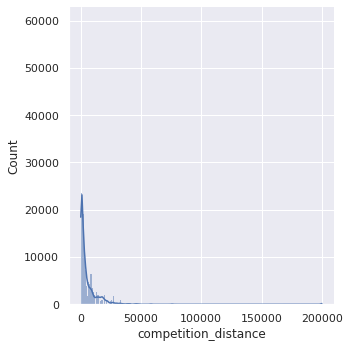

In [99]:
sns.displot(df_dd['competition_distance'], kde=True)